# Homework 1

Due 2/17/2026

Uzair Hamed Mohammed

## Instructions

In class, we compared vanilla Python to PyTorch and measured the speedup of vector-vector and vector-matrix multiplication in vectorized form vs. plain Python. **In this assignment, we will measure the speedup of matrix-matrix multiplication.**

### Requirements

- [x] Python
- [x] PyTorch
- [x] Matplotlib
- [x] Numpy

## Submission

- [x] PDF document modeled after a professional research paper.
- [x] `.py` or `.ipynb` file with code.

## Specifications

- [x] (3 pts) Title, author name, sections, setting up problem, dividing approach, snippets of code with explanation, conclusion.
- [x] (1 pt) Generate data as Python matrices (list of lists) of random numbers. Need two matrices:
    - $W$ [90 x m]
    - $X$ [m x 110]

    `m` will take ten different values 10..100, **aka ten timing experiments**. Include code that generates the data, but don't paste data in report.

- [x] (1 pt) Vanilla Python function that multiplies $W \times X$ using loops.
- [x] (1 pt) Transform data into `torch.tensor`, $W_t$ and $X_t$.
- [x] (1 pt) Vectorized multiplication of $W_t$ and $X_t$.
- [x] (2 pts) Use `timeit()` function for both vanilla Python and vectorized multiplication for each of the ten values of `m`.
- [x] (1 pt) Plot graph using `matplotlib` showing speed improvement with following characteristics:
    - $x$-axis: ten values of `m`
    - $y$-axis: speed improvement as ratio $\frac{\textrm{time}_\textrm{vanilla}}{\textrm{time}_\textrm{vectorized}}$

    Give plot title and label axes.

Machine Architecture: ARM64
PyTorch Version: 2.10.0+cpu
PyTorch Tensor Match: True
NumPy Version: 2.4.2
NumPy Math Check: True


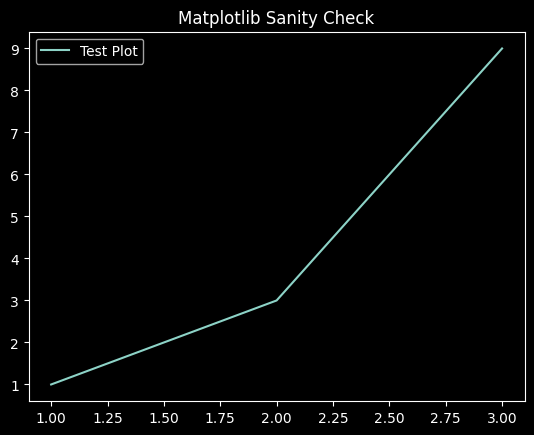

In [1]:
# Test Environment

import torch
import numpy as np
import matplotlib.pyplot as plt
import platform

# 1. Verify Platform
print(f"Machine Architecture: {platform.machine()}")

# 2. Test PyTorch (Matrix Multiplication test)
# Construct two 3x3 tensors
t1 = torch.ones(3, 3)
t2 = torch.eye(3)
t_result = torch.matmul(t1, t2)
print(f"PyTorch Version: {torch.__version__}")
print(f"PyTorch Tensor Match: {torch.equal(t1, t_result)}")

# 3. Test NumPy
n_arr = np.array([1, 2, 3])
print(f"NumPy Version: {np.__version__}")
print(f"NumPy Math Check: {n_arr.mean() == 2.0}")

# 4. Test Matplotlib
plt.plot([1, 2, 3], [1, 3, 9], label='Test Plot')
plt.title("Matplotlib Sanity Check")
plt.legend()
plt.show()

Multiplying matrices:
[[24.0, 28.0], [43.0, 50.0]]
Running for m = 10
Running for m = 20
Running for m = 30
Running for m = 40
Running for m = 50
Running for m = 60
Running for m = 70
Running for m = 80
Running for m = 90
Running for m = 100


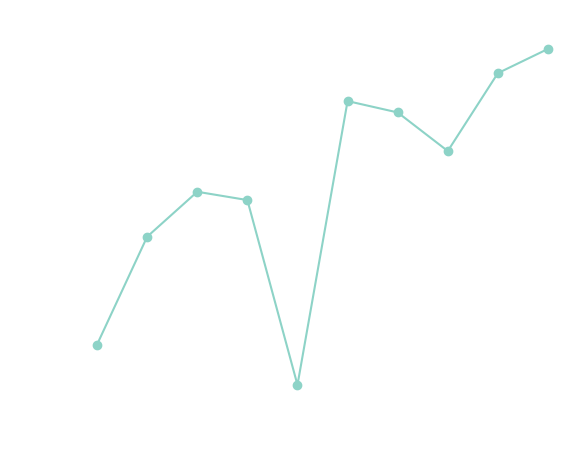

Speedup values: ['1642.37', '1985.69', '2128.79', '2102.33', '1513.71', '2417.55', '2381.34', '2258.49', '2506.50', '2583.63']


In [8]:
import random
import torch
import timeit
import matplotlib.pyplot as plt

# W - 90 x m
# X - m x 110

# Generate a rows x columns matrix of random numbers
def gen_random_matrix(rows, cols):
    return [[random.random() for _ in range(cols)] for _ in range(rows)]

# Matrix multiplication using plain Python
def vanilla_matmul(W, X):
    rows_W = len(W)
    cols_W = len(W[0])
    rows_X = len(X)
    cols_X = len(X[0])

    if cols_W != rows_X:
        raise ValueError("Matrix dimensions do not match")

    result = [[0.0 for _ in range(cols_X)] for _ in range(rows_W)]

    for i in range(rows_W):
        for j in range(cols_X):
            total = 0.0
            for k in range(cols_W):
                total += W[i][k] * X[k][j]
            result[i][j] = total

    return result

def test_vanilla():
    w = [[2,2], [3,4]]
    x = [[5,6], [7,8]]

    print("Multiplying matrices:")
    multot = vanilla_matmul(w, x)
    print(multot)

test_vanilla()

# Define empty lists to store times
vanilla_times = []
vec_times = []
m_values = list(range(10, 101, 10))

# Number of repetitions
REPT_VANILLA = 10
REPT_VEC = 1000

for m in m_values:
    print(f"Running for m = {m}")

    W = gen_random_matrix(90, m)
    X = gen_random_matrix(m, 110)

    vanilla_time = timeit.timeit(lambda: vanilla_matmul(W, X), number=REPT_VANILLA)
    vanilla_avg = vanilla_time / REPT_VANILLA
    vanilla_times.append(vanilla_avg)

    W_t = torch.tensor(W, dtype=torch.float32)
    X_t = torch.tensor(X, dtype=torch.float32)

    vec_time = timeit.timeit(lambda: W_t @ X_t, number=REPT_VEC)
    vec_avg = vec_time / REPT_VEC
    vec_times.append(vec_avg)

speedup = [p / v for p, v in zip(vanilla_times, vec_times)]

plt.figure(facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

plt.plot(m_values, speedup, marker='o')
plt.xlabel('m')
plt.ylabel('Speedup (plain/vectorized)')
plt.title('Matrix Multiplication Speedup')
plt.grid(True)
# plt.savefig('speedup.svg', format='svg', bbox_inches='tight')
plt.show()

print("Speedup values:", [f"{s:.2f}" for s in speedup])